<a href="https://colab.research.google.com/github/ibonetc/IA_Pregrado_-2025/blob/main/IA_ML_Example_Dif_Classifiers_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de comparación de differentes clasificadores.

Ahora descargue la base de datos de iris y súbala a los archivos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Cargar los datos

In [3]:
columns=['sepal_length','sepal_width','petal_length','petal_width','class']

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Data_AI/iris.csv", header=None,names=columns)

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Análisis de los datos

### Distribución de los casos según la clase

In [6]:
data['class'].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [7]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

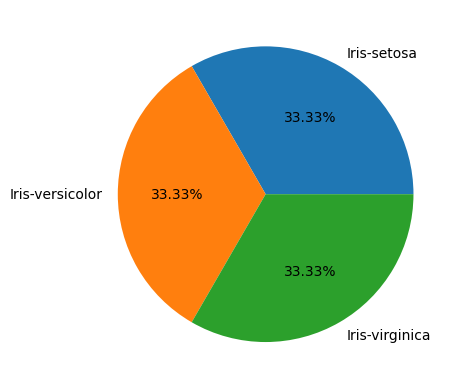

In [8]:
plt.pie(data['class'].value_counts(),
        labels = data['class'].unique(), autopct='%.2f%%');

### Cantidad por clases según el primer rasgo

In [9]:
import seaborn as sns

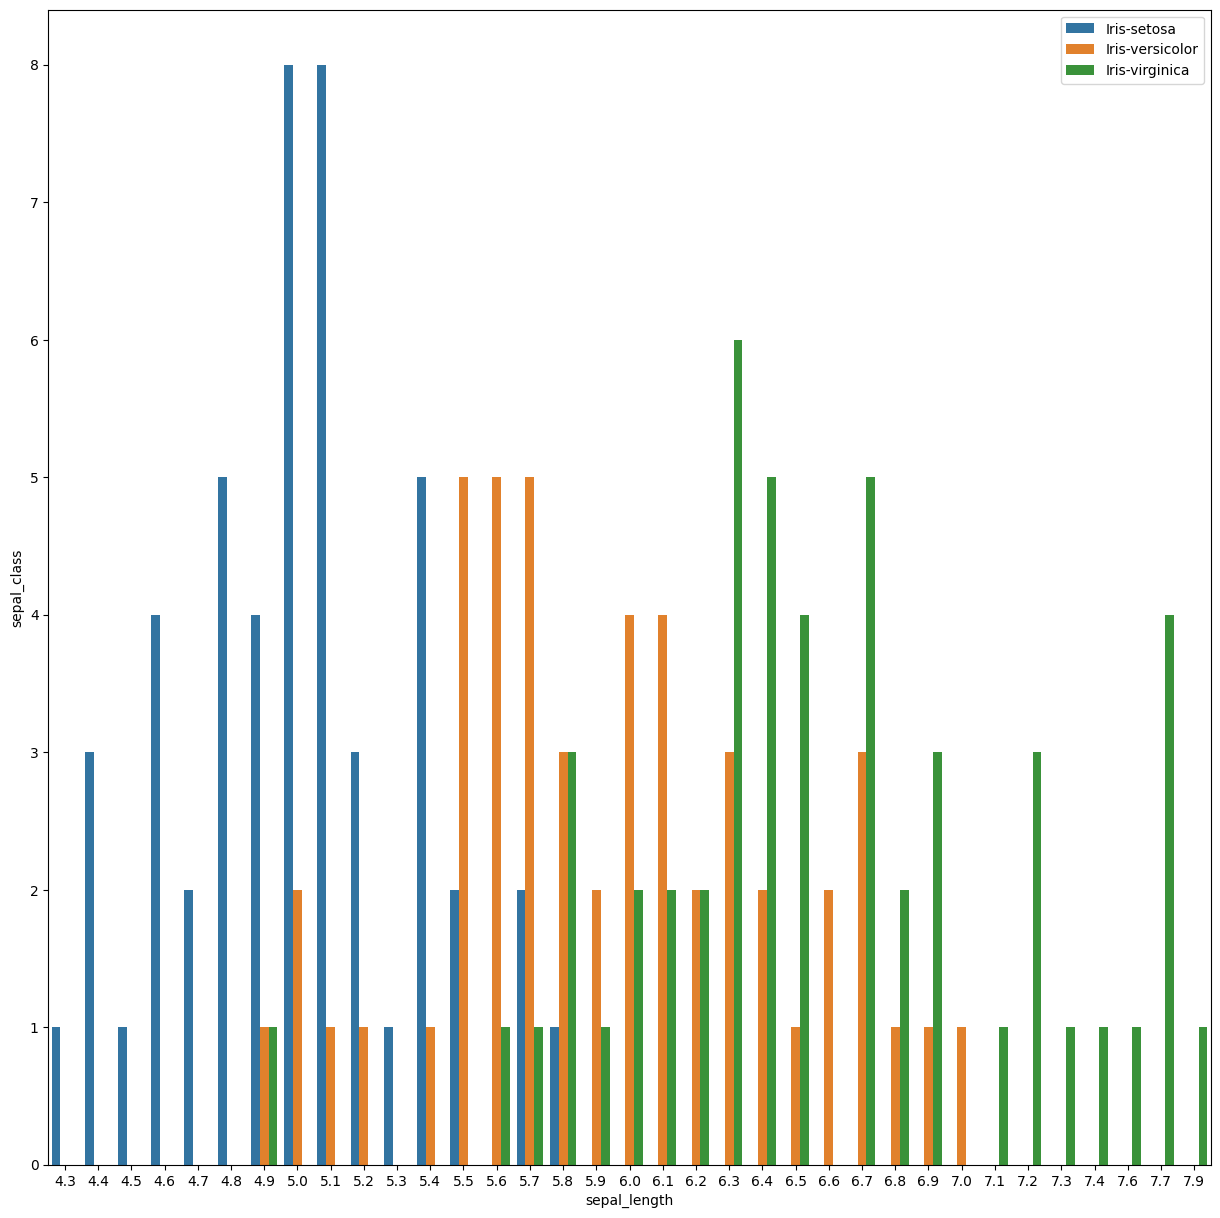

In [10]:
dfg = data.groupby(['sepal_length','class']).size().reset_index(name='sepal_class')
plt.figure(figsize=(15,15))
sns.barplot(x='sepal_length', y='sepal_class', data=dfg, hue='class')
plt.legend(loc='upper right')

### **Pairplot**

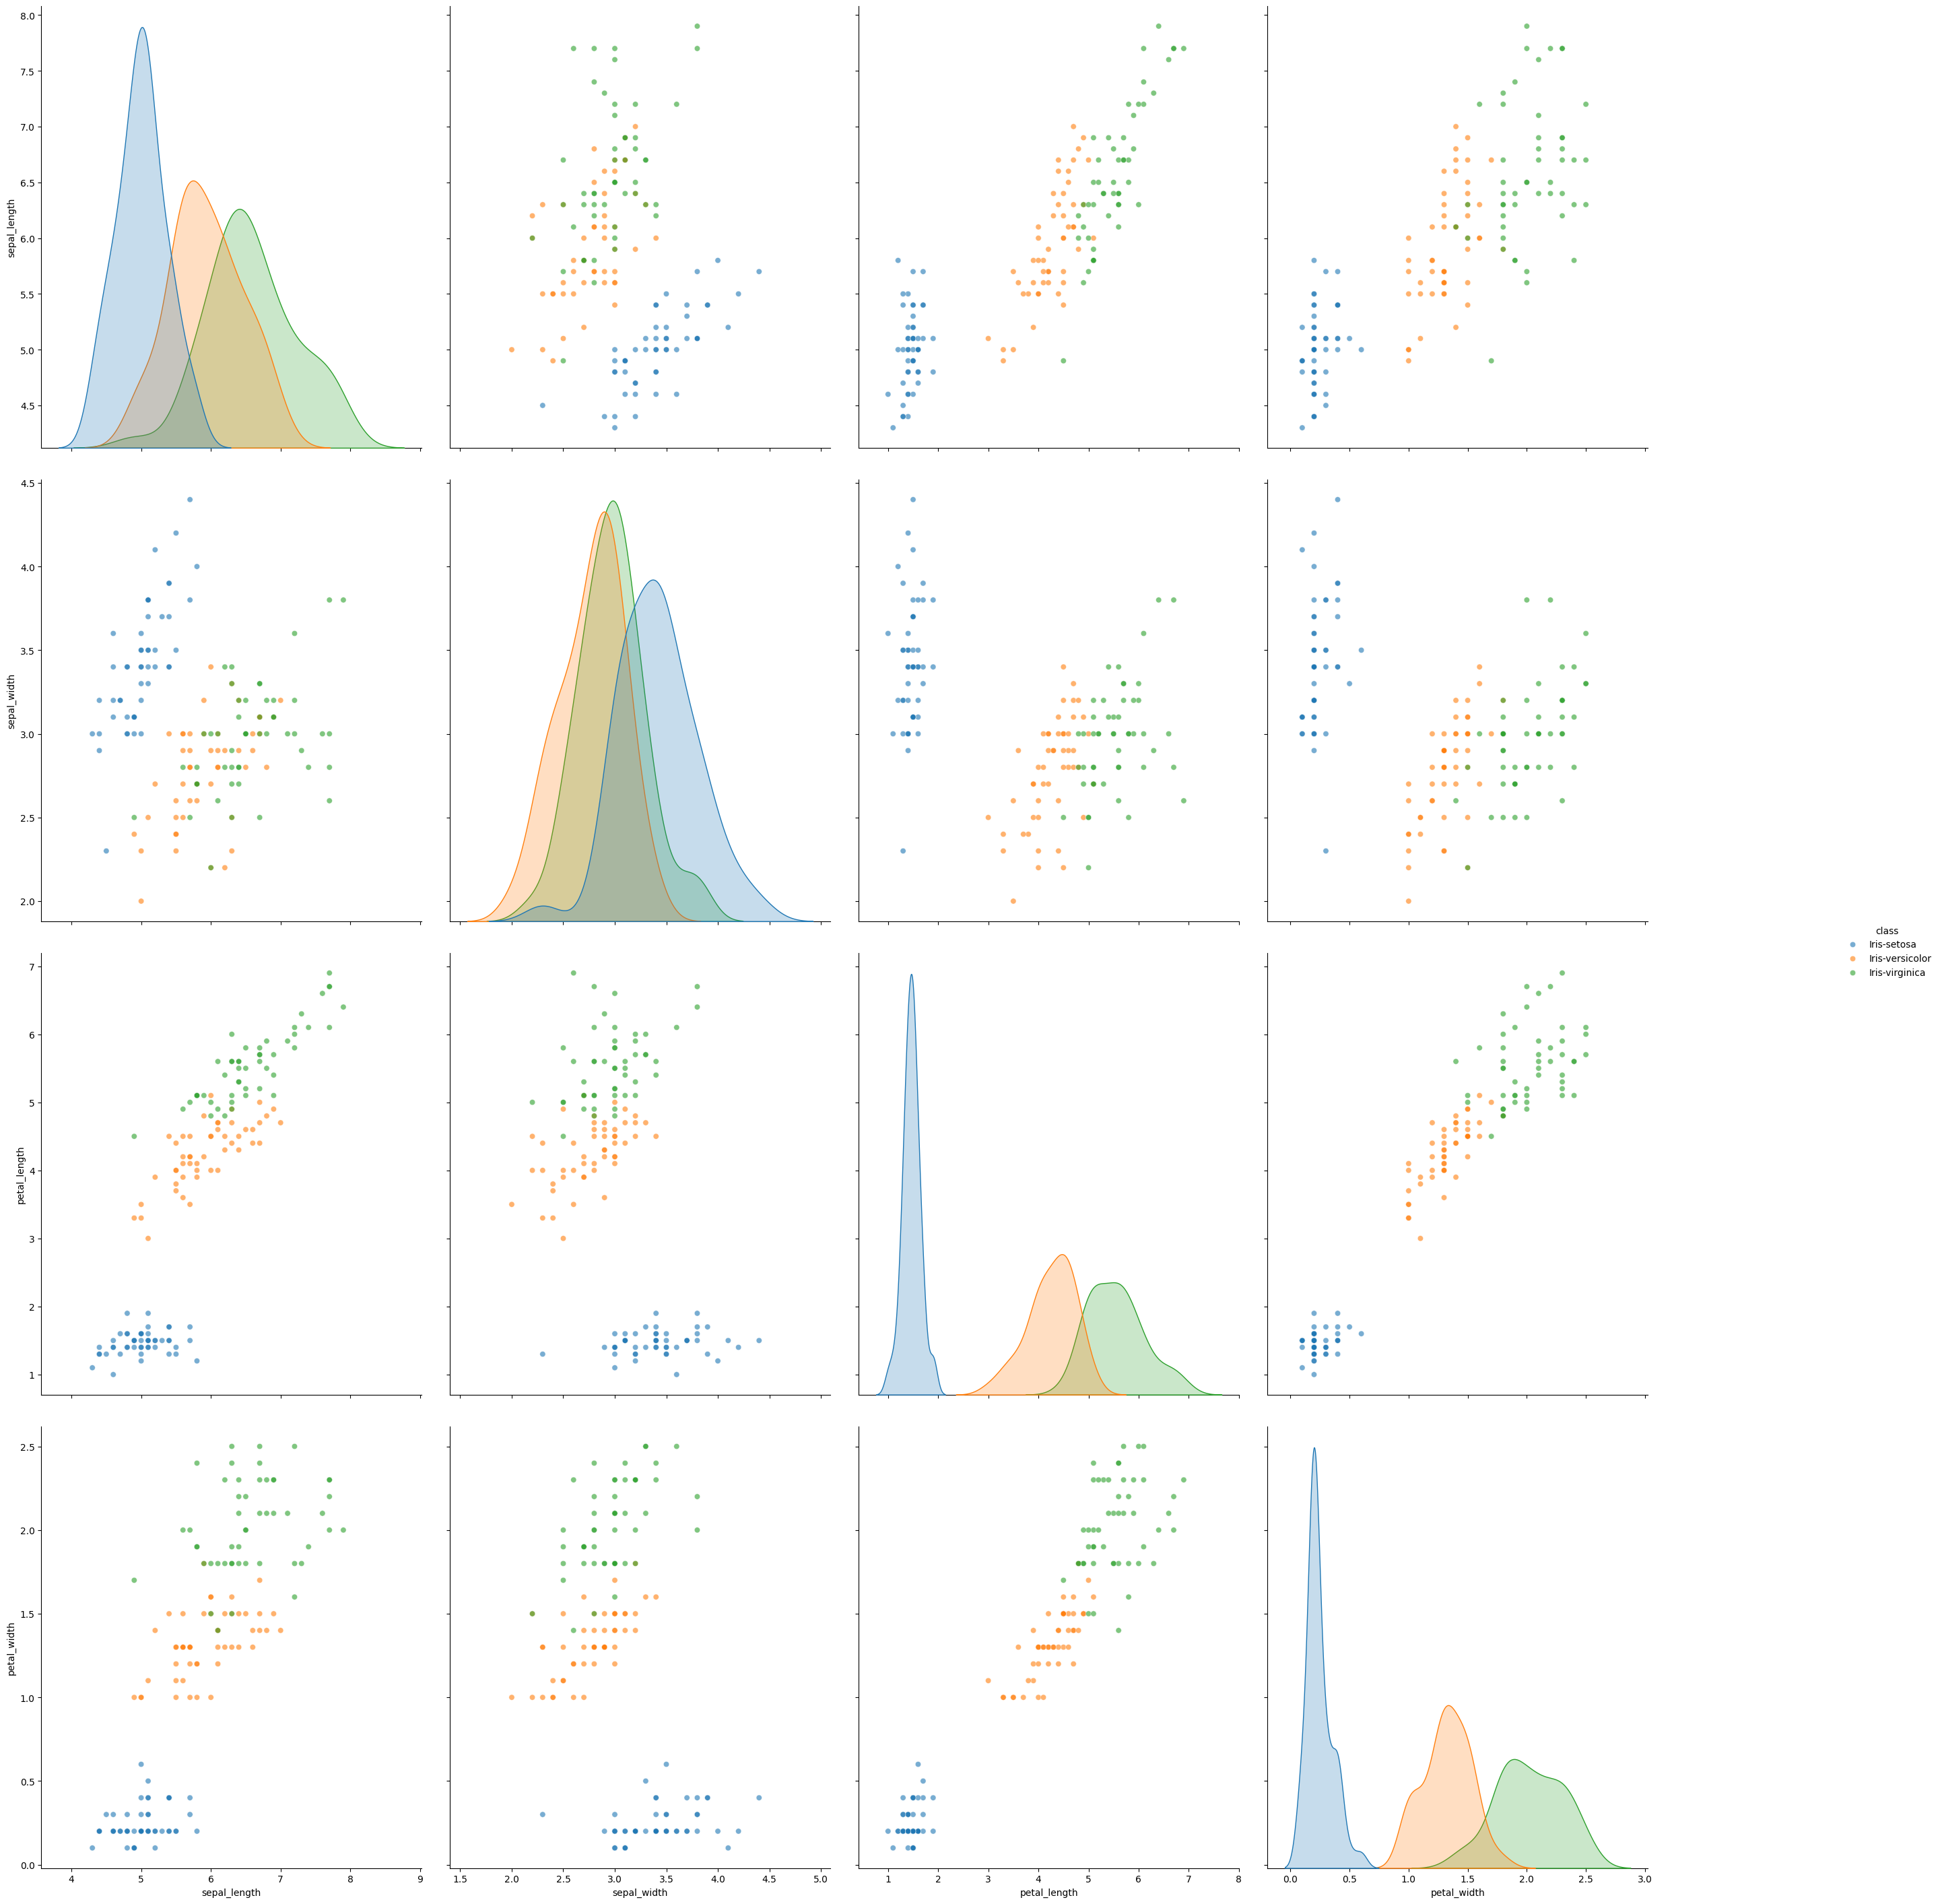

In [11]:
g = sns.pairplot(data, hue='class', plot_kws={'alpha':0.6})
g.fig.set_size_inches(30,30)

### **Análisis de correlación**

**Phik**: coeficiente de correlación práctico basado en varios refinamientos a la prueba de hipótesis de independencia de dos variables de Pearson

**Networkx**: paquete de python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas

In [12]:
!pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 9.1 MB/s eta 0:00:00


In [13]:
import phik
from phik import resources
from phik.binning import bin_data
from phik.decorators import *
from phik.report import plot_correlation_matrix
import networkx as nx

In [14]:
#categorical = list(data.select_dtypes(include ='object').columns)

interval columns not set, guessing: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


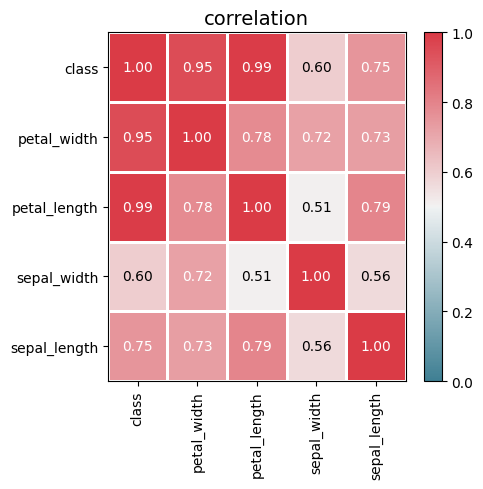

In [15]:
coerr_mat = data.phik_matrix()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plot_correlation_matrix(coerr_mat.values, x_labels=coerr_mat.columns, y_labels=coerr_mat.index,
                        vmin=0, vmax=1, color_map=cmap, figsize=(5, 5));

## Label encoding

In [16]:
from sklearn import preprocessing

In [17]:
dataset = data.values
X = dataset[:,0:-1].astype(float)
Y = dataset[:,-1]

In [18]:
le = preprocessing.LabelEncoder()

In [19]:
le.fit(Y)

LabelEncoder()

In [20]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
Y_int=le.transform(Y)
Y_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
le.inverse_transform([2,0,1,2])

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [23]:
le.inverse_transform(Y_int)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## División de datos en entrenamiento, prueba y validación

Escogeremos un 5% de los datos para validación, del resto un 85% para entrenamiento (con validación cruzada) y un 25% para prueba

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_val, y_train, y_val= train_test_split(X, Y_int, test_size=0.05, random_state=7,stratify=Y_int)

X_train, X_test, y_train, y_test= train_test_split(X_train, y_train, test_size=0.15, random_state=7,stratify=y_train)

In [26]:
print(np.unique(Y,return_counts=True))
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))
print(np.unique(y_val,return_counts=True))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([50, 50, 50]))
(array([0, 1, 2]), array([40, 40, 40]))
(array([0, 1, 2]), array([7, 7, 8]))
(array([0, 1, 2]), array([3, 3, 2]))


In [27]:
classes=np.unique(Y)
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [29]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [30]:
train_accuracy= knn.score(X_train, y_train)
test_accuracy=knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.9583333333333334
1.0


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_pred = knn.predict(X_test)

In [33]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

[[7 0 0]
 [0 7 0]
 [0 0 8]]


Predicted,0,1,2,All
True,,,,
0,7,0,0,7
1,0,7,0,7
2,0,0,8,8
All,7,7,8,22


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [35]:
y_train_pred=knn.predict(X)
print(classification_report(Y_int,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [36]:
y_pred_proba=knn.predict_proba(X)
y_pred_proba

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

In [37]:
neighbors = np.arange(1,15)

train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

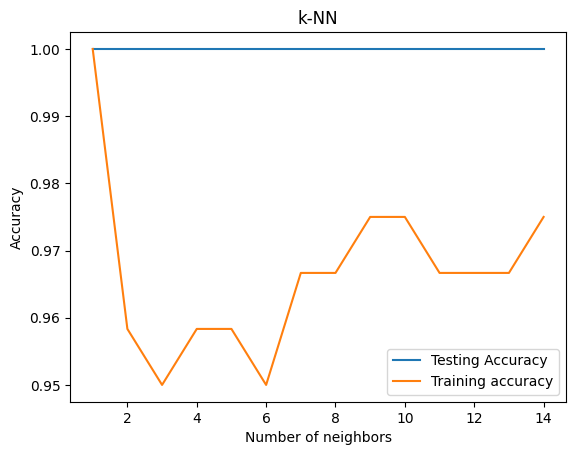

In [38]:
plt.title('k-NN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [40]:
knn.score(X,Y_int)

0.98

In [41]:
knn.predict([[0.8, 1,0.6,3]])

array([0])

In [42]:
knn.predict_proba([[0.8, 1,0.6,3]])

array([[1., 0., 0.]])

Para probar parámetros como en el K-NN la K, se puede también utilizar la siguiente función

In [43]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}

In [44]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [45]:
print(knn_cv.best_score_,knn_cv.best_params_)

0.975 {'n_neighbors': np.int64(16)}


### Validación Cruzada

In [46]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [47]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
accuracy = cross_val_score(knn, X, Y_int, cv=10)
scores = cross_validate(knn, X,Y_int, scoring=scoring, cv=10)

In [48]:
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [49]:
accuracy

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [50]:
print(accuracy.mean())
scores['test_recall_macro'].mean()

0.9666666666666668


np.float64(0.9666666666666666)

## MLP
Para el resto de los clasificadores use:

MLP: from sklearn.neural_network import MLPClassifier
SVM: from sklearn import svm

In [51]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=10,
                    random_state=1,max_iter=3000)


In [52]:
mlp.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=10, max_iter=3000, random_state=1)

In [53]:
scoring = ['recall_macro']
score_mlp=cross_validate(mlp, X,Y, scoring=scoring, cv=10)
accuracy = cross_val_score(mlp, X, Y, cv=10)


In [54]:
print(score_mlp['test_recall_macro'].mean())
print(accuracy.mean())


0.9666666666666666
0.9666666666666668


In [55]:
param_grid = {'hidden_layer_sizes':np.arange(2,20)}
mlp = MLPClassifier(alpha=1e-5,random_state=1, max_iter=3000)
mlp_cv= GridSearchCV(mlp,param_grid,cv=10,n_jobs=-1,verbose=10)
mlp_cv.fit(X,Y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10,
             estimator=MLPClassifier(alpha=1e-05, max_iter=3000,
                                     random_state=1),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             verbose=10)

In [56]:
print(mlp_cv.best_score_,mlp_cv.best_params_)

0.9866666666666667 {'hidden_layer_sizes': np.int64(17)}


In [57]:
#from sklearn.metrics import plot_confusion_matrix

In [58]:
mlp = MLPClassifier(hidden_layer_sizes=17, alpha=1e-5, random_state=1, max_iter=2000)
mlp.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=17, max_iter=2000, random_state=1)

In [59]:
y_predict=mlp.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [61]:
cm=confusion_matrix(y_test,y_predict)

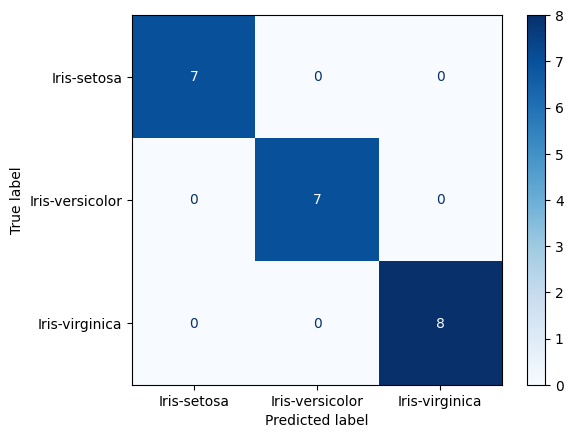

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [63]:
y_predict_val=mlp.predict(X_val)

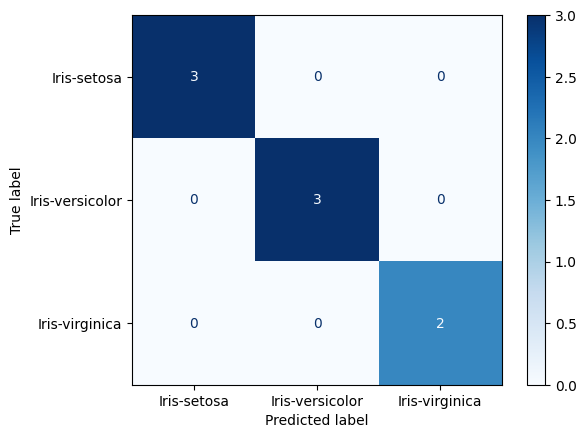

In [64]:
cm_val=confusion_matrix(y_val,y_predict_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

### Usando KFold o StratifiedKFold

In [65]:
#mlp = MLPClassifier(hidden_layer_sizes=17, alpha=1e-5,random_state=1, max_iter=2000)

In [66]:
from statistics import mean, stdev

In [67]:
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
for train_index, test_index in kfold:
  mlp = MLPClassifier(hidden_layer_sizes=17, alpha=1e-5,random_state=1,max_iter=2000)
  X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
  y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
  mlp.fit(X_train_cv, y_train_cv)
  scores.append(mlp.score(X_test_cv,y_test_cv))
accuracy=mean(scores)*100
accuracy

96.66666666666667

**¿Cómo saber la predicción en cada fold?**

Calcule la matriz de confusión para esta validación cruzada

In [68]:
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X, Y)
scores = []
predicted_y=np.array([])
real_y=np.array([])
for train_index, test_index in kfold:
  mlp = MLPClassifier(hidden_layer_sizes=17, alpha=1e-5,random_state=1,max_iter=2000)
  X_train_cv, X_test_cv = X[train_index], X[test_index]
  y_train_cv, y_test_cv = Y[train_index], Y[test_index]
  mlp.fit(X_train_cv, y_train_cv)
  scores.append(mlp.score(X_test_cv,y_test_cv))
  py=mlp.predict(X_test_cv)
  predicted_y=np.append(predicted_y,py)
  real_y=np.append(real_y,y_test_cv)
accuracy=mean(scores)*100
accuracy

98.66666666666667

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
classes=np.unique(Y)
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [71]:
cnf_matrix = confusion_matrix(real_y, predicted_y)

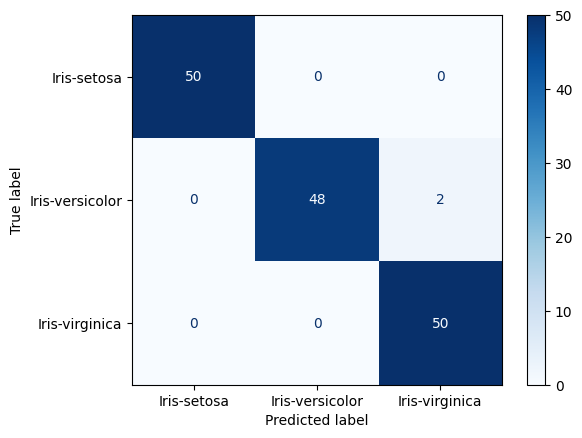

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

## Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
bn = GaussianNB()

In [78]:
bn.fit(X_train,y_train)

GaussianNB()

In [79]:
y_predict=bn.predict(X_test)

In [80]:
cm=confusion_matrix(y_test,y_predict)

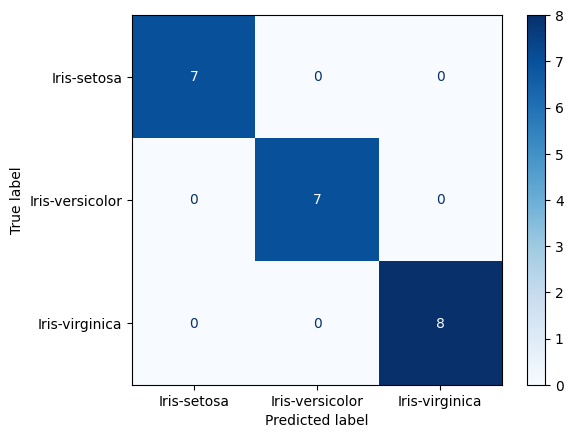

In [81]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

## Guardar un modelo

In [82]:
import joblib
joblib.dump(bn, 'bn.pkl')

['bn.pkl']

## Cargar el modelo entrenado

In [83]:
bn_trained = joblib.load('bn.pkl')

In [84]:
bn_trained.predict(X_test)

array([0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2])

In [85]:
y_predict

array([0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2])

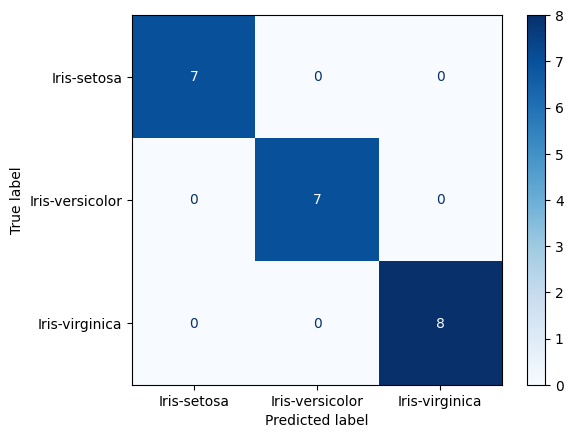

In [86]:
y_predicted2=bn_trained.predict(X_test)
cm=confusion_matrix(y_test,y_predicted2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

## Comparar con validación cruzada varios métodos

In [87]:
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X, Y)

In [88]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import itertools
def cvClassifiers(X,Y, list_Classifiers):
  strtfdKFold = StratifiedKFold(n_splits=10)
  kfold = strtfdKFold.split(X, Y)
  scores = [[] for c in list_Classifiers]
  predicted_y=[[] for c in list_Classifiers]
  real_y=[[] for c in list_Classifiers]
  for train_index, test_index in kfold:
    for i,c in enumerate(list_Classifiers):
      model = clone(c)
      X_train_cv, X_test_cv = X[train_index], X[test_index]
      y_train_cv, y_test_cv = Y[train_index], Y[test_index]
      model.fit(X_train_cv, y_train_cv)
      scores[i].append(model.score(X_test_cv,y_test_cv))
      py=model.predict(X_test_cv)
      predicted_y[i]=list(itertools.chain(predicted_y[i],py.flatten().tolist()))
      real_y[i]=list(itertools.chain(real_y[i],y_test_cv.flatten().tolist()))
  accuracy=[mean(sc)*100 for sc in scores]
  cm=[confusion_matrix(real_y[i],predicted_y[i]) for i in range(0,len(list_Classifiers))]
  return accuracy, cm

In [89]:
list_Classifiers=[
              GaussianNB(),
              MLPClassifier(hidden_layer_sizes=17, alpha=1e-5,random_state=1, max_iter=2000),
]

In [90]:
a, c =cvClassifiers(X_train, y_train,list_Classifiers)

In [91]:
a

[94.16666666666667, 96.66666666666667]

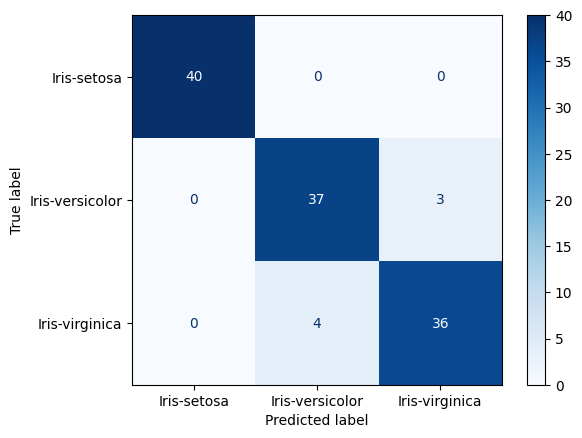

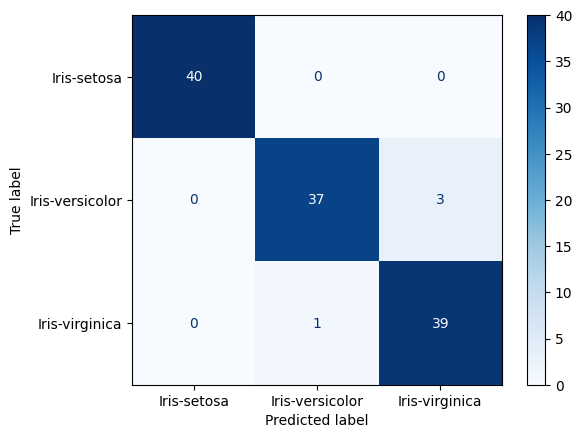

In [92]:
for i in range(0,len(c)):
  disp = ConfusionMatrixDisplay(confusion_matrix=c[i], display_labels=classes)
  disp.plot(cmap=plt.cm.Blues)

### Multiclassificadores

In [93]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator : object, default=None

por defecto es: sklearn.tree.DecisionTreeClassifier

In [94]:
ab = AdaBoostClassifier(n_estimators=10)

In [95]:
a, c =cvClassifiers(X_train, y_train,[ab])

In [96]:
a

[94.16666666666667]

In [97]:
c

[array([[40,  0,  0],
        [ 0, 37,  3],
        [ 0,  4, 36]])]

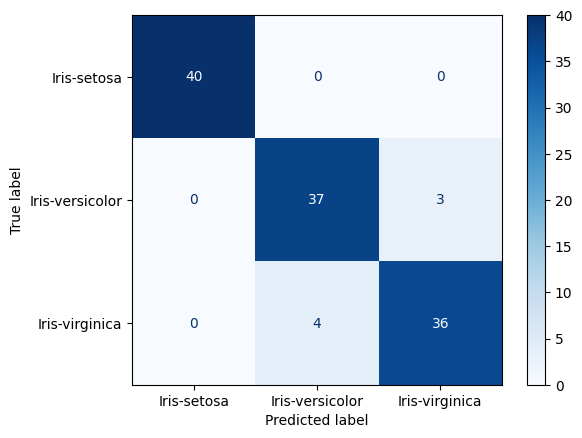

In [98]:
disp = ConfusionMatrixDisplay(confusion_matrix=c[0], display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [99]:
ab = AdaBoostClassifier(base_estimator=svm.SVC(),n_estimators=50)

AttributeError: 'SVC' object has no attribute 'SVC'

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bg= BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10)

In [ ]:
bg= BaggingClassifier(n_estimators=10)

In [ ]:
a, c =cvClassifiers(X_train, y_train,[bg])

In [ ]:
a

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=c[0], display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
estimators = [
('tree',DecisionTreeClassifier()),
('svm', SVR(kernel='poly', C=100, gamma='auto', degree=2, epsilon=.1,coef0=1)),
('mlp', MLPClassifier(hidden_layer_sizes=17, alpha=1e-5,random_state=1, max_iter=2000))
]

In [ ]:
stkg = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
a, c =cvClassifiers(X_train, y_train,[bg])

In [ ]:
a

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [ ]:
a, c =cvClassifiers(X_train, y_train,[BaggingClassifier(n_estimators=100)])
print(a)
disp = ConfusionMatrixDisplay(confusion_matrix=c[0], display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
a, c =cvClassifiers(X_train, y_train,[RandomForestClassifier(n_estimators=100)])
print(a)
disp = ConfusionMatrixDisplay(confusion_matrix=c[0], display_labels=classes)
disp.plot(cmap=plt.cm.Blues)